In [10]:
import pandas as pd

url = "https://raw.githubusercontent.com/Prakyatp/SupervisedPCA/main/dataset/alzheimers_disease_data.csv"
df = pd.read_csv(url)

print(df.head(10))  # Display first 5 rows


   PatientID  Age  Gender  Ethnicity  EducationLevel        BMI  Smoking  \
0       4751   73       0          0               2  22.927749        0   
1       4752   89       0          0               0  26.827681        0   
2       4753   73       0          3               1  17.795882        0   
3       4754   74       1          0               1  33.800817        1   
4       4755   89       0          0               0  20.716974        0   
5       4756   86       1          1               1  30.626886        0   
6       4757   68       0          3               2  38.387622        1   
7       4758   75       0          0               1  18.776009        0   
8       4759   72       1          1               0  27.833188        0   
9       4760   87       0          0               0  35.456302        1   

   AlcoholConsumption  PhysicalActivity  DietQuality  ...  MemoryComplaints  \
0           13.297218          6.327112     1.347214  ...                 0   
1    

In [15]:
df.shape

(2149, 35)

In [17]:
df.describe()

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis,DoctorInCharge
count,2149,2149,2149,2149,2149,2149,2149,2149,2149,2149,...,2149,2149,2149,2149,2149,2149,2149,2149,2149,2149
unique,2149,31,2,4,4,2149,2,2149,2149,2149,...,2,2,2149,2,2,2,2,2,2,1
top,4751,88,1,0,1,22.927749230993864,0,13.29721772827684,6.327112473553353,1.3472143059081076,...,0,0,1.7258834599441897,0,0,0,0,0,0,XXXConfid
freq,1,84,1088,1278,854,1,1529,1,1,1,...,1702,1812,1,1708,1809,1825,1808,1501,1389,2149


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2149 entries, 0 to 2148
Data columns (total 35 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   PatientID                  2149 non-null   object
 1   Age                        2149 non-null   object
 2   Gender                     2149 non-null   object
 3   Ethnicity                  2149 non-null   object
 4   EducationLevel             2149 non-null   object
 5   BMI                        2149 non-null   object
 6   Smoking                    2149 non-null   object
 7   AlcoholConsumption         2149 non-null   object
 8   PhysicalActivity           2149 non-null   object
 9   DietQuality                2149 non-null   object
 10  SleepQuality               2149 non-null   object
 11  FamilyHistoryAlzheimers    2149 non-null   object
 12  CardiovascularDisease      2149 non-null   object
 13  Diabetes                   2149 non-null   object
 14  Depressi

In [20]:
df.isnull().sum()

,0
PatientID,0
Age,0
Gender,0
Ethnicity,0
EducationLevel,0
BMI,0
Smoking,0
AlcoholConsumption,0
PhysicalActivity,0
DietQuality,0


In [21]:
duplicates = df[df.duplicated()]

if not duplicates.empty:
    print("\nDuplicate Rows:")
    print(duplicates)
else:
    print("\nNo duplicate rows found.")


No duplicate rows found.


In [22]:
df.drop_duplicates(inplace=True)


In [24]:
# Check if the dataset has a diagnosis or target column
target_column = "Diagnosis"  # Replace with the actual column name

# Count unique values
class_distribution = df[target_column].value_counts()

print("\nClass Distribution:")
print(class_distribution)



Class Distribution:
Diagnosis
0    1389
1     760
Name: count, dtype: int64


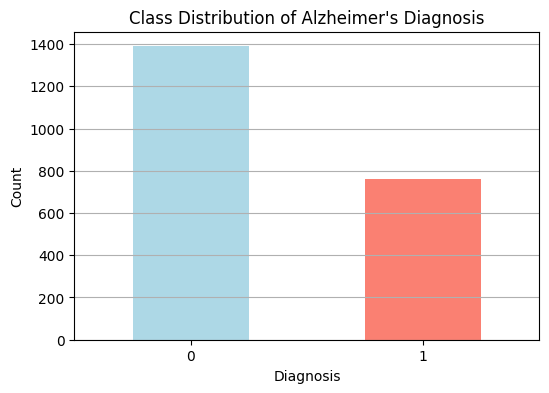

In [25]:
import matplotlib.pyplot as plt

# Bar plot for class distribution
plt.figure(figsize=(6, 4))
class_distribution.plot(kind="bar", color=["lightblue", "salmon"])
plt.xlabel("Diagnosis")
plt.ylabel("Count")
plt.title("Class Distribution of Alzheimer's Diagnosis")
plt.xticks(rotation=0)
plt.grid(axis="y")
plt.show()


In [ ]:
#resampling

In [31]:
df = df.drop(columns=['DoctorInCharge'])


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2149 entries, 0 to 2148
Data columns (total 34 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   PatientID                  2149 non-null   object
 1   Age                        2149 non-null   object
 2   Gender                     2149 non-null   object
 3   Ethnicity                  2149 non-null   object
 4   EducationLevel             2149 non-null   object
 5   BMI                        2149 non-null   object
 6   Smoking                    2149 non-null   object
 7   AlcoholConsumption         2149 non-null   object
 8   PhysicalActivity           2149 non-null   object
 9   DietQuality                2149 non-null   object
 10  SleepQuality               2149 non-null   object
 11  FamilyHistoryAlzheimers    2149 non-null   object
 12  CardiovascularDisease      2149 non-null   object
 13  Diabetes                   2149 non-null   object
 14  Depressi

In [ ]:
import numpy as np
import scipy.linalg
import matplotlib.pyplot as plt

# Separate features (X) and target (y)
X = df.drop(columns=["Diagnosis"]).values  # Features
y = df["Diagnosis"].values  # Target labels

# Standardize X (zero mean, unit variance)
X_mean = np.mean(X, axis=0)
X_std = np.std(X, axis=0)
X = (X - X_mean) / (X_std + 1e-8)  # Avoid division by zero

# Step 1: Compute covariance matrix of X
cov_matrix = np.cov(X, rowvar=False)

TypeError: unsupported operand type(s) for /: 'str' and 'int'

In [37]:
# Identify non-numeric columns in the DataFrame
non_numeric_columns = df.select_dtypes(exclude=["number"]).columns

# Print the non-numeric columns
print("Non-numeric columns:", non_numeric_columns)

# Optionally, check the data types for more details
print(df[non_numeric_columns].dtypes)


Non-numeric columns: Index(['PatientID', 'Age', 'Gender', 'Ethnicity', 'EducationLevel', 'BMI',
       'Smoking', 'AlcoholConsumption', 'PhysicalActivity', 'DietQuality',
       'SleepQuality', 'FamilyHistoryAlzheimers', 'CardiovascularDisease',
       'Diabetes', 'Depression', 'HeadInjury', 'Hypertension', 'SystolicBP',
       'DiastolicBP', 'CholesterolTotal', 'CholesterolLDL', 'CholesterolHDL',
       'CholesterolTriglycerides', 'MMSE', 'FunctionalAssessment',
       'MemoryComplaints', 'BehavioralProblems', 'ADL', 'Confusion',
       'Disorientation', 'PersonalityChanges', 'DifficultyCompletingTasks',
       'Forgetfulness', 'Diagnosis'],
      dtype='object')
PatientID                    object
Age                          object
Gender                       object
Ethnicity                    object
EducationLevel               object
BMI                          object
Smoking                      object
AlcoholConsumption           object
PhysicalActivity             object
Die

In [38]:
# Identify numeric columns in the DataFrame
numeric_columns = df.select_dtypes(include=["number"]).columns

# Print the numeric columns
print("Numeric columns:", numeric_columns)

# Optionally, check the data types for more details
print(df[numeric_columns].dtypes)


Numeric columns: Index([], dtype='object')
Series([], dtype: object)


In [39]:
# Convert all columns to numeric (coerce errors to NaN if any non-convertible strings exist)
df = df.apply(pd.to_numeric, errors='coerce')

# Check the first few rows to ensure the conversion worked
print(df.head())

# Optionally, check the data types to confirm they are numeric
print(df.dtypes)


   PatientID  Age  Gender  Ethnicity  EducationLevel        BMI  Smoking  \
0       4751   73       0          0               2  22.927749        0   
1       4752   89       0          0               0  26.827681        0   
2       4753   73       0          3               1  17.795882        0   
3       4754   74       1          0               1  33.800817        1   
4       4755   89       0          0               0  20.716974        0   

   AlcoholConsumption  PhysicalActivity  DietQuality  ...  \
0           13.297218          6.327112     1.347214  ...   
1            4.542524          7.619885     0.518767  ...   
2           19.555085          7.844988     1.826335  ...   
3           12.209266          8.428001     7.435604  ...   
4           18.454356          6.310461     0.795498  ...   

   FunctionalAssessment  MemoryComplaints  BehavioralProblems       ADL  \
0              6.518877                 0                   0  1.725883   
1              7.118696   

In [40]:
import numpy as np
import scipy.linalg
import matplotlib.pyplot as plt

# Separate features (X) and target (y)
X = df.drop(columns=["Diagnosis"]).values  # Features
y = df["Diagnosis"].values  # Target labels

# Standardize X (zero mean, unit variance)
X_mean = np.mean(X, axis=0)
X_std = np.std(X, axis=0)
X = (X - X_mean) / (X_std + 1e-8)  # Avoid division by zero

# Step 1: Compute covariance matrix of X
cov_matrix = np.cov(X, rowvar=False)

In [41]:
# Step 2: Compute the correlation between X and y
xy_correlation = np.dot(X.T, y - np.mean(y))

# Step 3: Compute supervised covariance matrix
supervised_cov_matrix = np.dot(xy_correlation[:, None], xy_correlation[None, :]) + cov_matrix

# Step 4: Perform eigen decomposition
eigenvalues, eigenvectors = scipy.linalg.eigh(supervised_cov_matrix)

# Step 5: Sort eigenvectors by descending eigenvalues
idx = np.argsort(eigenvalues)[::-1]
eigenvectors = eigenvectors[:, idx]

# Step 6: Project data onto top k components
k = 2  # Number of components you want to project onto
X_spca = np.dot(X, eigenvectors[:, :k])


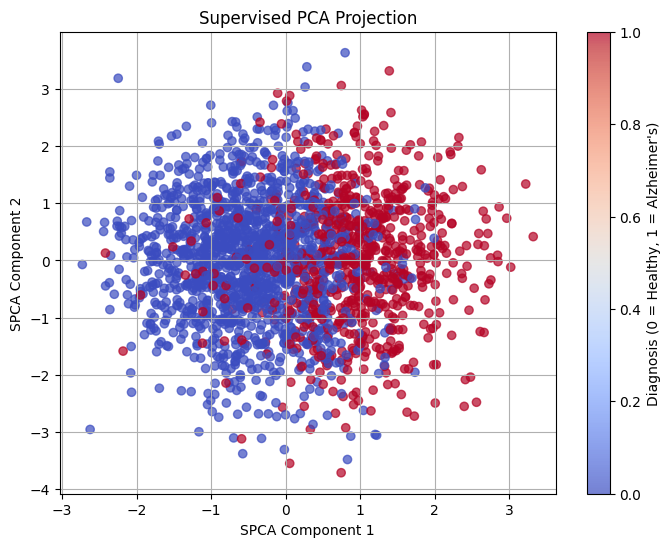

Transformed Data Shape (SPCA): (2149, 2)


In [42]:
# Visualize the transformed data
plt.figure(figsize=(8, 6))
plt.scatter(X_spca[:, 0], X_spca[:, 1], c=y, cmap="coolwarm", alpha=0.7)
plt.xlabel("SPCA Component 1")
plt.ylabel("SPCA Component 2")
plt.title("Supervised PCA Projection")
plt.colorbar(label="Diagnosis (0 = Healthy, 1 = Alzheimer's)")
plt.grid(True)
plt.show()

# Print the transformed data shape
print("Transformed Data Shape (SPCA):", X_spca.shape)

In [43]:
# Split data into training and testing sets
from sklearn.model_selection import train_test_split

# Use a simple split, 80% for training, 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Verify the shape of the splits
print(f"X_train shape: {X_train.shape}, X_test shape: {X_test.shape}")

X_train shape: (1719, 33), X_test shape: (430, 33)


In [44]:
# Accuracy
def accuracy(y_true, y_pred):
    return np.mean(y_true == y_pred)

# Precision
def precision(y_true, y_pred):
    tp = np.sum((y_pred == 1) & (y_true == 1))
    fp = np.sum((y_pred == 1) & (y_true == 0))
    return tp / (tp + fp) if (tp + fp) != 0 else 0

# Recall
def recall(y_true, y_pred):
    tp = np.sum((y_pred == 1) & (y_true == 1))
    fn = np.sum((y_pred == 0) & (y_true == 1))
    return tp / (tp + fn) if (tp + fn) != 0 else 0

# F1-score
def f1_score(y_true, y_pred):
    p = precision(y_true, y_pred)
    r = recall(y_true, y_pred)
    return 2 * (p * r) / (p + r) if (p + r) != 0 else 0

# Confusion Matrix
def confusion_matrix(y_true, y_pred):
    tp = np.sum((y_pred == 1) & (y_true == 1))
    tn = np.sum((y_pred == 0) & (y_true == 0))
    fp = np.sum((y_pred == 1) & (y_true == 0))
    fn = np.sum((y_pred == 0) & (y_true == 1))
    return np.array([[tn, fp], [fn, tp]])

# Print the metrics
y_pred_train = model_predict(X_train)  # Example of training prediction
y_pred_test = model_predict(X_test)  # Example of testing prediction

print("Training Metrics:")
print(f"Accuracy: {accuracy(y_train, y_pred_train)}")
print(f"Precision: {precision(y_train, y_pred_train)}")
print(f"Recall: {recall(y_train, y_pred_train)}")
print(f"F1 Score: {f1_score(y_train, y_pred_train)}")

print("Testing Metrics:")
print(f"Accuracy: {accuracy(y_test, y_pred_test)}")
print(f"Precision: {precision(y_test, y_pred_test)}")
print(f"Recall: {recall(y_test, y_pred_test)}")
print(f"F1 Score: {f1_score(y_test, y_pred_test)}")

# Confusion Matrix
print("Confusion Matrix (Test):")
print(confusion_matrix(y_test, y_pred_test))


NameError: name 'model_predict' is not defined

In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from autograd import grad
from autograd.numpy import dot
from sklearn.model_selection import train_test_split

# Step 1: Implementing Supervised PCA (SPCA)
def supervised_pca(X, y, n_components=2):
    # Standardize the features
    X_mean = np.mean(X, axis=0)
    X_std = np.std(X, axis=0)
    X = (X - X_mean) / (X_std + 1e-8)  # Avoid division by zero

    # Compute the covariance matrix
    X_centered = X - np.mean(X, axis=0)
    cov_matrix = np.cov(X_centered.T)

    # Eigenvalue decomposition
    eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)

    # Sort eigenvalues and eigenvectors
    sorted_indices = np.argsort(eigenvalues)[::-1]  # Sort in descending order
    eigenvectors = eigenvectors[:, sorted_indices]

    # Project data onto the first n components
    X_spca = np.dot(X, eigenvectors[:, :n_components])

    return X_spca

# Step 2: Train a simple logistic regression model
def logistic_regression(X, y, learning_rate=0.01, epochs=1000):
    # Initialize weights and bias
    weights = np.zeros(X.shape[1])
    bias = 0

    # Logistic regression function
    def sigmoid(z):
        return 1 / (1 + np.exp(-z))

    # Gradient descent optimization
    for epoch in range(epochs):
        # Compute the linear model
        linear_model = np.dot(X, weights) + bias
        y_pred = sigmoid(linear_model)

        # Compute the gradients
        dw = (1 / len(X)) * np.dot(X.T, (y_pred - y))
        db = (1 / len(X)) * np.sum(y_pred - y)

        # Update the weights and bias
        weights -= learning_rate * dw
        bias -= learning_rate * db

    return weights, bias

# Step 3: Make predictions with the trained logistic regression model
def predict(X, weights, bias):
    linear_model = np.dot(X, weights) + bias
    y_pred = 1 / (1 + np.exp(-linear_model))
    return (y_pred >= 0.5).astype(int)

# Step 4: Calculate evaluation metrics
def accuracy(y_true, y_pred):
    return np.mean(y_true == y_pred)

def precision(y_true, y_pred):
    tp = np.sum((y_pred == 1) & (y_true == 1))
    fp = np.sum((y_pred == 1) & (y_true == 0))
    return tp / (tp + fp) if (tp + fp) != 0 else 0

def recall(y_true, y_pred):
    tp = np.sum((y_pred == 1) & (y_true == 1))
    fn = np.sum((y_pred == 0) & (y_true == 1))
    return tp / (tp + fn) if (tp + fn) != 0 else 0

def f1_score(y_true, y_pred):
    p = precision(y_true, y_pred)
    r = recall(y_true, y_pred)
    return 2 * (p * r) / (p + r) if (p + r) != 0 else 0

# Example Data
# Assuming your dataset is loaded into df with 'Diagnosis' as the target
X = df.drop(columns=["Diagnosis"]).values  # Features
y = df["Diagnosis"].values  # Target labels

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Apply Supervised PCA (SPCA)
X_train_spca = supervised_pca(X_train, y_train, n_components=2)
X_test_spca = supervised_pca(X_test, y_test, n_components=2)

# Step 6: Train Logistic Regression on SPCA features
weights, bias = logistic_regression(X_train_spca, y_train, learning_rate=0.01, epochs=1000)

# Step 7: Make predictions on test set
y_pred_train = predict(X_train_spca, weights, bias)
y_pred_test = predict(X_test_spca, weights, bias)

# Step 8: Calculate and print evaluation metrics
print("Training Metrics:")
print(f"Accuracy: {accuracy(y_train, y_pred_train)}")
print(f"Precision: {precision(y_train, y_pred_train)}")
print(f"Recall: {recall(y_train, y_pred_train)}")
print(f"F1 Score: {f1_score(y_train, y_pred_train)}")

print("Testing Metrics:")
print(f"Accuracy: {accuracy(y_test, y_pred_test)}")
print(f"Precision: {precision(y_test, y_pred_test)}")
print(f"Recall: {recall(y_test, y_pred_test)}")
print(f"F1 Score: {f1_score(y_test, y_pred_test)}")


Training Metrics:
Accuracy: 0.6468877254217569
Precision: 0.5
Recall: 0.006589785831960461
F1 Score: 0.013008130081300813
Testing Metrics:
Accuracy: 0.6488372093023256
Precision: 0.6666666666666666
Recall: 0.026143790849673203
F1 Score: 0.05031446540880503
